test if the distribution of ages is the same for 

1) male and female riders

2) day and night riders

use 3 tests: KS, Pearson's, Spearman's. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a significant threshold for the whole eercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [1]:

# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats

from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading from CSV File
df = pd.read_csv('/gws/open/Student/citibike/201701-citibike-tripdata.csv.zip')

In [3]:
# Adding a new Column Date
df['date'] = pd.to_datetime(df['Start Time'])


In [4]:
# Dropping Unnecessary Columns
df.drop(['Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude','User Type','Bike ID','Birth Year', 'Gender'], axis=1, inplace=True)

In [5]:
df.columns

Index(['Trip Duration', 'date'], dtype='object')

### Trip duration of bikers that ride during the day vs night

### H0: Trip duration of bikers that ride during the day vs night have no statistical significance $$ \alpha = 0.05 $$

In [6]:
df['hour'] = df['date'].dt.hour

In [7]:
def tod(hour):
    if hour >= 6 and hour < 18:
        return '1'
    else:
        return '0'

In [13]:
df['Nite'] = df['hour'].apply(tod)

In [14]:
df.head()

,Trip Duration,hour,Nite
0,680,0,0
1,1282,0,0
2,648,0,0
3,631,0,0
4,621,0,0


In [16]:
df.drop(['date'], axis=1, inplace=True)

ValueError: labels ['date'] not contained in axis

In [17]:
df.head()

,Trip Duration,hour,Nite
0,680,0,0
1,1282,0,0
2,648,0,0
3,631,0,0
4,621,0,0


In [18]:
df['dayduration'] = df['Trip Duration'][(df['Nite'] == '0')]
df['nightduration'] = df['Trip Duration'][(df['Nite'] == '1')]

In [20]:
df['dayduration'].dropna(inplace= True)
df['nightduration'].dropna(inplace= True)
df.head()

,Trip Duration,hour,Nite,dayduration,nightduration
0,680,0,0,680.0,NaN
1,1282,0,0,1282.0,NaN
2,648,0,0,648.0,NaN
3,631,0,0,631.0,NaN
4,621,0,0,621.0,NaN


In [21]:
df.describe()


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Trip Duration,hour,dayduration,nightduration
count,7.266760e+05,726676.000000,1.970480e+05,5.296280e+05
mean,7.778989e+02,13.418412,7.874612e+02,7.743413e+02
std,1.124683e+04,4.882191,1.840802e+04,6.890680e+03
min,6.100000e+01,0.000000,6.100000e+01,6.100000e+01
25%,3.310000e+02,9.000000,NaN,NaN
50%,5.260000e+02,14.000000,NaN,NaN
75%,8.600000e+02,17.000000,NaN,NaN
max,5.325688e+06,23.000000,5.325688e+06,3.152489e+06


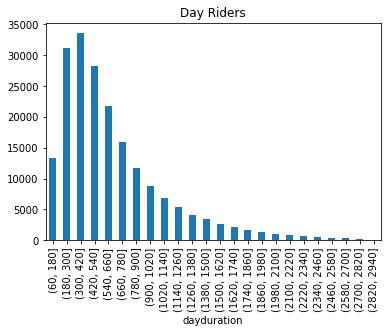

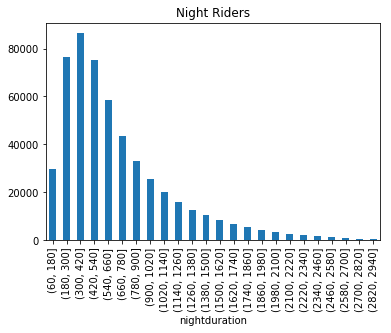

In [23]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3000, 120)
axD = df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day Riders")
axN = df.nightduration.groupby(pd.cut(df.nightduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night Riders");

              count_nonzero
dayduration                
(60, 180]          0.012014
(180, 300]         0.025520
(300, 420]         0.032342
(420, 540]         0.033428
(540, 660]         0.032903
(660, 780]         0.031304
(780, 900]         0.028023
(900, 1020]        0.024324
(1020, 1140]       0.021246
(1140, 1260]       0.018379
(1260, 1380]       0.015249
(1380, 1500]       0.012551
(1500, 1620]       0.009642
(1620, 1740]       0.007693
(1740, 1860]       0.006011
(1860, 1980]       0.004576
(1980, 2100]       0.003497
(2100, 2220]       0.002835
(2220, 2340]       0.002117
(2340, 2460]       0.001578
(2460, 2580]       0.001107
(2580, 2700]       0.000698
(2700, 2820]       0.000309
(2820, 2940]       0.000000


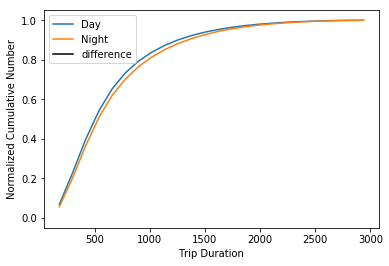

In [25]:
#cumulative sum

csD=df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).cumsum()

csN=df.nightduration.groupby(pd.cut(df.nightduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 120, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 120, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 120, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()


Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! 

But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.

Notice that there may be NaN values you are gonna have to deal with! You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...
lets run the scipy KS test

In [26]:
ks = scipy.stats.ks_2samp(df.dayduration, df.nightduration)
print (ks)

Ks_2sampResult(statistic=0.035691019427567638, pvalue=1.9783680732802433e-159)


The P Value of the sample is very small 1.9783680732802433e-159 which means that it is much smaller than 1% for the set α value of 0.05, so the Null hypothesis gets falsified. 

The scipy.stats KS test already tells me the significance and the p-value.
The next few cells are here just to show you how you would obtain the same result by hand, but they are not required.
Remember: the Null hypothesis is rejected if
$D_KS(n1,n2) &gt; c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$
(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!!
http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/
But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

## Working with reduced dataset selecting every 200th trip

In [32]:
df2 = df.iloc[0:1]
n = int((len(df))/200)
for i in range(n):
    df2 = df2.append(df.iloc[200*i-1:200*i])

In [33]:
len(df2)

3633

In [34]:
df2['dayduration'].dropna(inplace= True)
df2['nightduration'].dropna(inplace= True)

In [35]:

ks2 = scipy.stats.ks_2samp(df2.dayduration, df2.nightduration)
print (ks2)

Ks_2sampResult(statistic=0.052191020940901001, pvalue=0.038798912810047832)


## Testing for Correlation

The P Value of the sample is very small 0.03879891 which means that it is much smaller than 1% for the set α value of 0.05, so the Null hypothesis gets falsified. 

Now retest using a test for correlation.
That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring: choice(a, size=None, replace=True, p=None)
Generates a random sample from a given 1-D array
    .. versionadded:: 1.7.0

Parameters ...
But make sure you understand how to use it! there is an option "replace" which you should think about.


## Pearson's test for correlation

Pearson's is a pairwise test: the samples need to be a. the same size b. sorted! 

In [36]:
df['dayduration'].dropna(inplace= True)
df['nightduration'].dropna(inplace= True)

In [40]:
scipy.stats.pearsonr?

In [38]:
dayduration = df.dayduration
nightduration = df.nightduration.iloc[:len(dayduration)]
pr = scipy.stats.pearsonr(nightduration, dayduration)
print (pr)

(-0.00020749301059055117, 0.92661402093834688)


The P Value is 0.92661402093834688 which is a good enough statistical measure, So this Null hypothesis cannot be Falsified and there is a Negative Correlation between Day Duration and teh Night Duration as per Pearson Test

## Spearman's test for correlation¶

In [41]:
spr = scipy.stats.spearmanr(nightduration, dayduration)
print(spr)

SpearmanrResult(correlation=-0.0022754218410966556, pvalue=0.31246813533167794)


In [ ]:
The pvalue=0.31246813533167794 and there is a negative Correlation. Therefore the Null Hypothesis cannot be justified.

## H0: Age of bikers for trips originating in Manhattan and in Brooklyn have no statistical variation

In [91]:
# Reading from CSV File
dfa = pd.read_csv('/gws/open/Student/citibike/201702-citibike-tripdata.csv.zip')

In [92]:
dfb = pd.read_csv('/gws/open/Student/citibike/201703-citibike-tripdata.csv.zip')

In [93]:
frames = (dfa, dfb)

In [94]:
dfbkup = pd.concat(frames)

In [95]:
dfbkup.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [96]:
# draw a rectangle usong lat/long to separate BK and MN trips; y = lat, x = long
# lat for MN is above 40.698215
# long for MN is left of -73.970755
# define a function that creates a new columns and assigns 1 or 0 based on long/lat

#lat = dfbkup['start station latitude']

#if (lat >= lat_min)
# df['borough] = df[[dfbkup['start station latitude'], dfbkup['start station longitude']]].apply(func, axis=1)

# define function for assigning values in column
def name_boro(lat_long):
    lat, long = lat_long
    if (lat <= 40.698215) and (long >= -73.970755):
        return '1'
    else:
        return '0'
    
# could do if lat <=  & lat >= or something like that to make a box

dfbkup['borough'] = dfbkup[['Start Station Latitude', 'Start Station Latitude']].apply(name_boro, axis=1)
dfbkup.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,borough
0,1087,2017-02-01 00:00:13,2017-02-01 00:18:20,345,W 13 St & 6 Ave,40.736494,-73.997044,305,E 58 St & 3 Ave,40.760958,-73.967245,17432,Subscriber,1966.0,1,0
1,704,2017-02-01 00:00:31,2017-02-01 00:12:15,3295,Central Park W & W 96 St,40.791270,-73.964839,2006,Central Park S & 6 Ave,40.765909,-73.976342,20621,Customer,NaN,0,0
2,212,2017-02-01 00:00:34,2017-02-01 00:04:06,336,Sullivan St & Washington Sq,40.730477,-73.999061,439,E 4 St & 2 Ave,40.726281,-73.989780,16826,Subscriber,1984.0,1,0
3,1140,2017-02-01 00:00:44,2017-02-01 00:19:44,484,W 44 St & 5 Ave,40.755003,-73.980144,3295,Central Park W & W 96 St,40.791270,-73.964839,27052,Subscriber,1980.0,1,0
4,320,2017-02-01 00:00:42,2017-02-01 00:06:02,490,8 Ave & W 33 St,40.751551,-73.993934,3431,E 35 St & 3 Ave,40.746524,-73.977885,25238,Subscriber,1987.0,1,0


In [97]:
dfc.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1087,2017-02-01 00:00:13,2017-02-01 00:18:20,345,W 13 St & 6 Ave,40.736494,-73.997044,305,E 58 St & 3 Ave,40.760958,-73.967245,17432,Subscriber,1966.0,1
1,704,2017-02-01 00:00:31,2017-02-01 00:12:15,3295,Central Park W & W 96 St,40.791270,-73.964839,2006,Central Park S & 6 Ave,40.765909,-73.976342,20621,Customer,NaN,0
2,212,2017-02-01 00:00:34,2017-02-01 00:04:06,336,Sullivan St & Washington Sq,40.730477,-73.999061,439,E 4 St & 2 Ave,40.726281,-73.989780,16826,Subscriber,1984.0,1
3,1140,2017-02-01 00:00:44,2017-02-01 00:19:44,484,W 44 St & 5 Ave,40.755003,-73.980144,3295,Central Park W & W 96 St,40.791270,-73.964839,27052,Subscriber,1980.0,1
4,320,2017-02-01 00:00:42,2017-02-01 00:06:02,490,8 Ave & W 33 St,40.751551,-73.993934,3431,E 35 St & 3 Ave,40.746524,-73.977885,25238,Subscriber,1987.0,1


In [98]:
# Dropping Unnecessary Columns
dfbkup.drop(['Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude','User Type','Bike ID', 'Gender'], axis=1, inplace=True)

In [99]:
dfbkup.columns

Index(['Trip Duration', 'Birth Year', 'borough'], dtype='object')

In [100]:
dfbkup['Birth Year'].dropna(inplace= True)

In [101]:
dfbkup.columns

Index(['Trip Duration', 'Birth Year', 'borough'], dtype='object')

In [104]:
dfbkup.head()

,Trip Duration,Birth Year,borough
0,1087,1966.0,0
1,704,NaN,0
2,212,1984.0,0
3,1140,1980.0,0
4,320,1987.0,0


In [124]:
dfbkup['Birth Year'].dropna(inplace= True)

In [125]:
(dfbckup['Birth Year'].dtype)

dtype('float64')

In [111]:
dfbkup['Age'] = 2017.0 - dfbkup['Birth Year']

ValueError: cannot reindex from a duplicate axis

In [109]:
dfbkup['Brooklyn'] = dfbkup['Birth Year'][(dfbkup['borough'] == '1')]
dfbkup['Manhattan'] = dfbkup['Birth Year'][(dfbkup['borough'] == '0')]

ValueError: cannot reindex from a duplicate axis

In [106]:

dfbkup.head()

,Trip Duration,Birth Year,borough
0,1087,1966.0,0
1,704,NaN,0
2,212,1984.0,0
3,1140,1980.0,0
4,320,1987.0,0


In [ ]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3000, 120)
axD = dfbkup.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = df.nightduration.groupby(pd.cut(df.nightduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders");